**TASK_5_EXPLORATORY_DATA_ANALYSIS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv(r"C:\Users\Rakshitha K B\Documents\ELEVATE LABS INTERNSHIP\DATASETS\Titan-ML Dataset\train.csv")
test_data = pd.read_csv(r"C:\Users\Rakshitha K B\Documents\ELEVATE LABS INTERNSHIP\DATASETS\Titan-ML Dataset\test.csv")
gender_submission_data = pd.read_csv(r"C:\Users\Rakshitha K B\Documents\ELEVATE LABS INTERNSHIP\DATASETS\Titan-ML Dataset\gender_submission.csv")

Understanding the train data

In [12]:
#to check the data structure
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_data.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#to get the data types and missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Understanding the test data

In [10]:
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [15]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Value counts for the categorical variable

In [16]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
# Check value counts for multiple categorical columns together
categorical_cols = ['Sex', 'Survived', 'Embarked', 'SibSp', 'Parch']

for col in categorical_cols:
    print(f"\nValue counts for {col}:\n")
    print(train_data[col].value_counts())
    print("-"*40)



Value counts for Sex:

Sex
male      577
female    314
Name: count, dtype: int64
----------------------------------------

Value counts for Survived:

Survived
0    549
1    342
Name: count, dtype: int64
----------------------------------------

Value counts for Embarked:

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
----------------------------------------

Value counts for SibSp:

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
----------------------------------------

Value counts for Parch:

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
----------------------------------------


In [18]:
# Check value counts for multiple categorical columns together in test data
categorical_cols = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']

for col in categorical_cols:
    print(f"\nValue counts for {col}:\n")
    print(test_data[col].value_counts())
    print("-"*40)



Value counts for Sex:

Sex
male      266
female    152
Name: count, dtype: int64
----------------------------------------

Value counts for Pclass:

Pclass
3    218
1    107
2     93
Name: count, dtype: int64
----------------------------------------

Value counts for Embarked:

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
----------------------------------------

Value counts for SibSp:

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64
----------------------------------------

Value counts for Parch:

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64
----------------------------------------


In [19]:
#checking the missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Filling missing 'Age' with the median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# Fill missing 'Cabin' with 'Unknown' (or any placeholder)
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')

# Fill missing 'Embarked' with the mode (most frequent value)
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

**UNIVARIATE ANALYSIS**

HISTOGRAM FOR NUMERICAL FEATURES

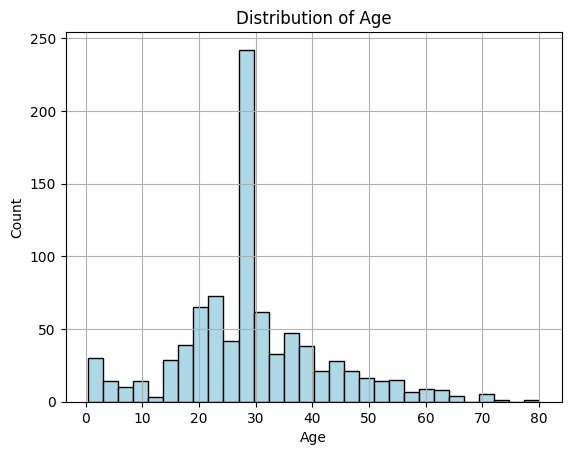

In [22]:
train_data['Age'].hist(bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Distribution of Age**
* Most passangers are between 20 to 40
* About 250 passengers are of age around 30
* Very few passangers are above 60 years

Countplot for categorical features Sex, Pclass

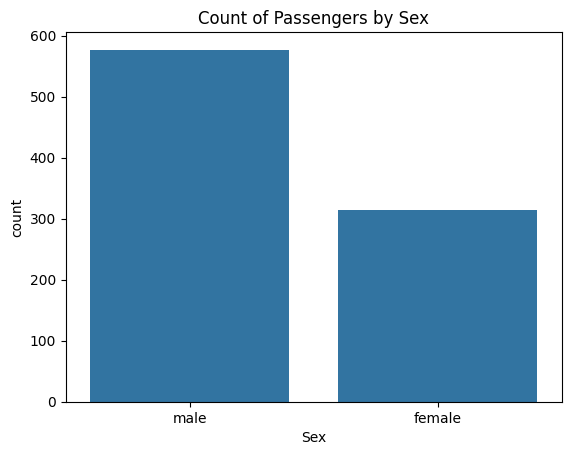

In [50]:

sns.countplot(x='Sex', data=train_data)
plt.title('Count of Passengers by Sex')
plt.show()


**Count of Passengers by Sex**
* The count of male passengers is the highest, with around 550+ out of 892, showing that men made up the majority of the passengers on board.

* The count of female passengers is around 300 out of 892, indicating that women were fewer in number compared to men on the Titanic.



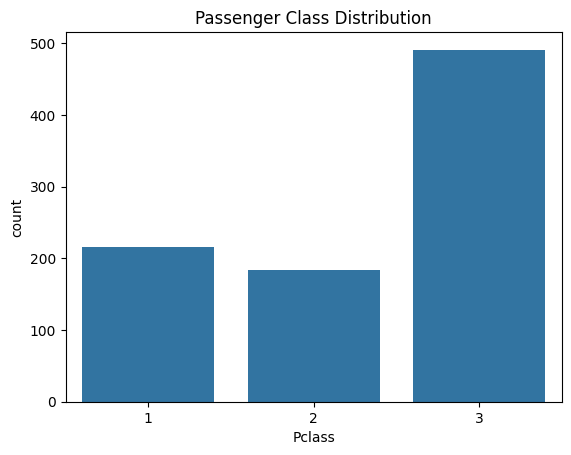

In [52]:
#COUNTPLOT FOR PASSANGER CLASS DISTRIBUTION
sns.countplot(x='Pclass', data=train_data)
plt.title('Passenger Class Distribution')
plt.show()

**Passenger Class Distribution plot** 

* The 3rd class had the highest number of passengers by a large margin , shows many were lower-income passengers, including immigrants.
* Interestingly, there were more 1st class passengers than 2nd class, despite higher ticket prices.

**BIVARIATE ANALYSIS**

Survival rate by gender

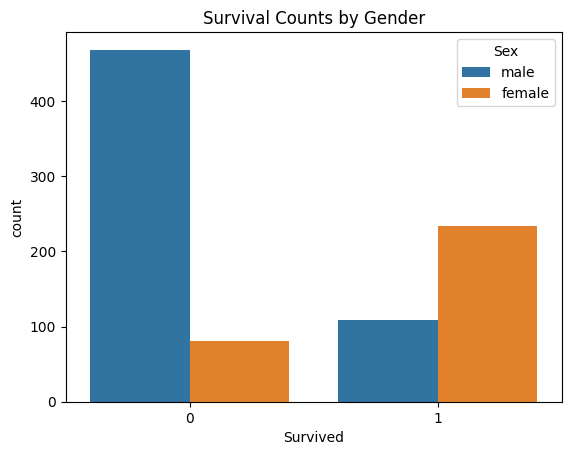

In [43]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Counts by Gender')
plt.show()

**Survival Counts by Gender**
* **Most deaths were male:** Over 400 of 549 who died were men, while fewer than 100 were women.
* **Most survivors were female:** Over 200 of 342 survivors were women, showing they had a higher survival rate.
* The trends are showing that **Female** passengers had a **higher survival** rate than **male** passengers. Most males did not survive.


Survival rate by Passenger Class

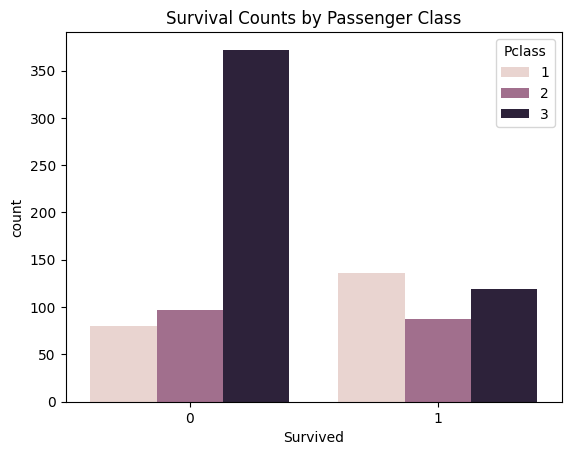

In [28]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival Counts by Passenger Class')
plt.show()


**Survival by Passenger Class**
* **3rd Class had the highest deaths:** Over 350 passengers in 3rd class not survived, while only 100+ survived, showing low survival rates for lower-class passengers.

* **1st Class had better survival:** Around 100+ survived and only 60–70 died, indicating higher survival chances for wealthier passengers.

* **2nd Class was in between:** Roughly 100 died and 50–70 survived, showing moderate survival rates compared to other classes.

BOXPLOT OF AGE VS SURVIVED

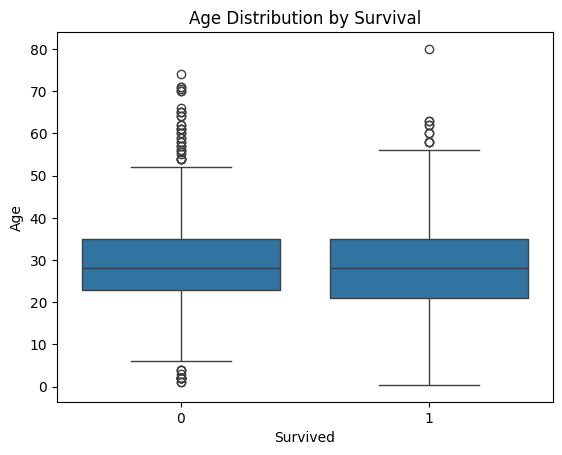

In [29]:
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Age Distribution by Survival')
plt.show()

**Age Distribution by Survival**

**Median Age:**
* The median age (middle line inside the box) of survived passengers (Survived = 1) is slightly lower than that of non-survived passengers (Survived = 0).

**Age Range:**
* Survived passengers show a wider interquartile range (IQR) (the width of the box) compared to non-survived passengers, suggesting more variability in the ages of those who survived.
* Both groups have ages ranging roughly from very young children (~0–5 years) to older adults (~80 years), but outliers are present.

**Outliers:**
* There are many outliers on the higher age side (60+ years) in both groups, more noticeable in the non-survived group.

**Survival Trend with Age:**
* It appears that younger individuals were slightly more likely to survive, based on the lower median and slight shift in the age distribution for the survived group.
* However, survival was not restricted to any one age group — people of all ages survived and died.

**MULTIVARIATE ANALYSIS**

SCATTERPLOT FOR FARE VS SURVIVED

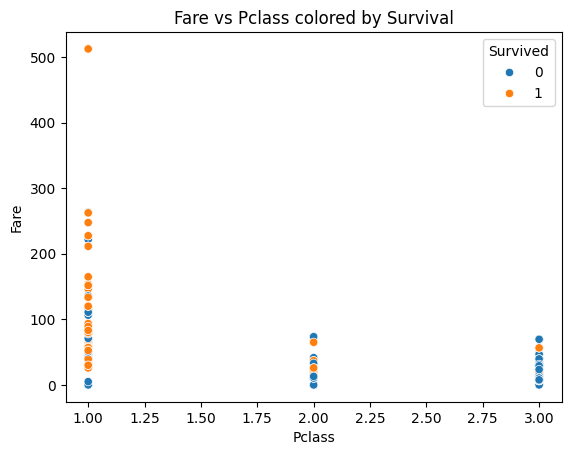

In [55]:
sns.scatterplot(y='Fare', x='Pclass', hue= 'Survived',  data=train_data)
plt.title('Fare vs Pclass colored by Survival')
plt.show()


**Fare vs Pclass by survival**
* **Pclass 1 passengers (1st class)** paid significantly **higher fares** compared to Pclass 2 and 3.

* Most of the **high fare passengers** were from **Pclass 1**, and many of them **survived** (orange dots).

* In **Pclass 2 and Pclass 3**, fares are much lower, and a larger number of passengers did not survive (more blue dots).

* **Higher class (Pclass 1) is associated with higher survival rates**, while lower classes (Pclass 2 and 3) show lower survival rates.

MULTIVARIATE ANALYSIS

Heatmap of correlations

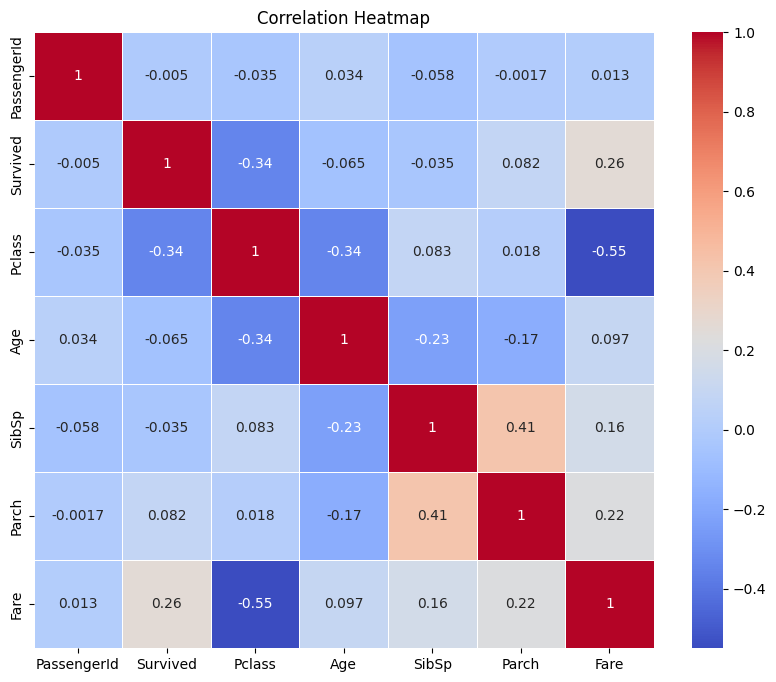

In [47]:
numeric_data = train_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Correlation Heatmap**
* Fare has a strong negative correlation with Pclass (-0.55):
→ Higher class (Pclass 1) passengers paid higher fares.

* Survived shows a positive correlation with Fare (0.26):
→ Passengers who paid more were more likely to survive.

* Parch (parents/children aboard) and SibSp (siblings/spouses aboard) have a moderate positive correlation (0.41):
→ People who traveled with siblings/spouses were often also traveling with parents/children.

* Age has a slight negative correlation with Parch and SibSp:
→ Younger passengers tended to travel with family more often.

* PassengerId has almost no meaningful correlation with any other features (as expected, since it's just an ID)

Pairplot

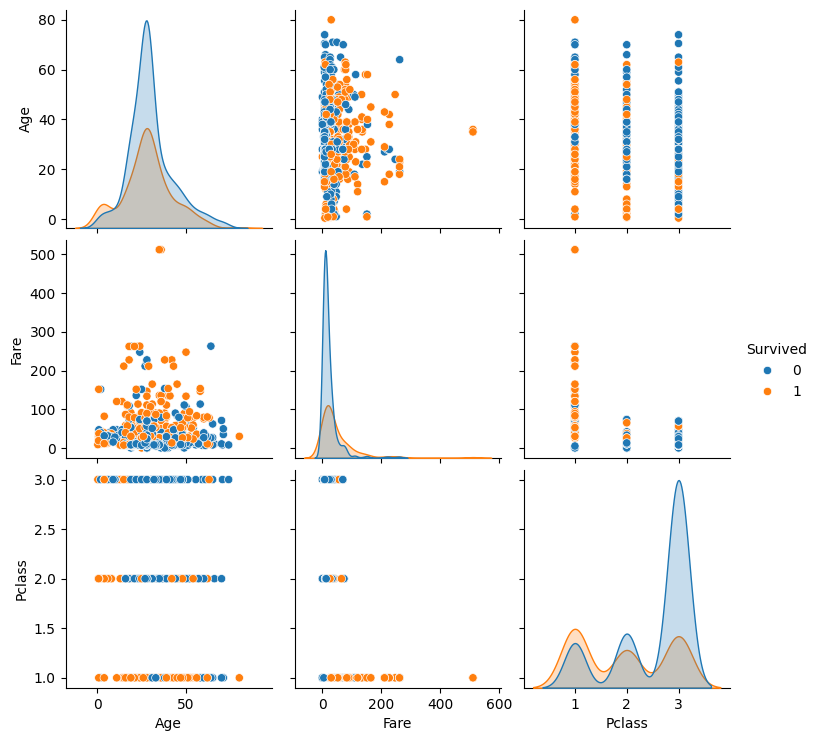

In [48]:
sns.pairplot(train_data[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()


**Observations from Pairplot:**
* **Age vs Survival:**
Younger passengers had slightly better chances of survival than older ones.

* **Fare vs Survival:**
Passengers who paid higher fares (above 100) mostly survived.

* **Pclass vs Survival:**
Most survivors were from 1st class (Pclass = 1).
Most non-survivors were from 3rd class (Pclass = 3).

* **Age vs Fare:**
There is no clear direct relation between age and fare. People of different ages paid a wide range of fares.

* **Overall Distribution:**

    * 3rd class had more passengers.

    * Fare distribution is highly skewed (most fares are low, few are very high).

    * Age distribution is centered around 20–30 years.

**SUMMARY AND KEY FINDINGS**

* Most passengers were aged between 20 to 40 years, with a peak around age 30.
* Very few passengers were above 60 years of age.
* Male passengers were the majority (550+ out of 892); females were fewer (around 300).
* 3rd class had the highest number of passengers, mostly lower-income or immigrants.
* There were more 1st class passengers than 2nd class, despite higher ticket prices.
* Most deaths were male, most survivors were female, males had a much lower survival rate.
* 3rd class had highest deaths, 1st class had better survival rates.
* 1st class passengers paid the highest fares, Lower class passengers paid less.
* Fare positively correlates with survival — passengers who paid more were more likely to survive.
* Survivors were slightly younger, with wider age variation. (60+ years) were more frequent in the non-survivor group.
* Fare and Pclass are strongly linked (1st class paid more).
* SibSp and Parch had a moderate positive correlation — families often traveled together.
* Family members often traveled together, especially younger passengers.
* Most survivors were from 1st class, most non-survivors from 3rd class.
* Fare distribution was skewed, most fares low, few very high.
* Age mostly ranged 20–30 years.